Airbnb project- Melbourne 2024

In order to get a better understanding of the data and address business questions,  we will take a look at some of the characteristics of the dataset.

First read the data and necessary libraries.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

df = pd.read_csv('./listings.csv')
pd.set_option('display.max_columns', None)

In [2]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10803,https://www.airbnb.com/rooms/10803,20241208033548,2024-12-08,city scrape,"Room in Deco Apartment, Brunswick East",A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within an hour,100%,94%,t,https://a0.muscache.com/im/pictures/user/6860c...,https://a0.muscache.com/im/pictures/user/6860c...,Brunswick,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Moreland,NaN,-37.766060,144.979510,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Pets allowed"", ""Portable fans"", ""Bathtub"", ""...",$55.00,4,29,1,4,29,29,4.0,29.0,NaN,t,10,27,48,317,2024-12-08,195,20,2,2013-01-12,2024-11-24,4.55,4.68,4.05,4.76,4.73,4.69,4.65,NaN,f,1,0,1,0,1.35
1,12936,https://www.airbnb.com/rooms/12936,20241208033548,2024-12-09,previous scrape,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,The A2C Team,2009-10-31,"Melbourne, Australia",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,St Kilda,10.0,20.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Port Phillip,NaN,-37.859990,144.976620,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Patio or balcony"", ""Extra pillows and blanke...",NaN,3,14,3,3,14,14,3.0,14.0,NaN,t,0,0,0,0,2024-12-09,42,0,0,2010-08-04,2020-03-15,4.68,4.78,4.71,4.83,4.83,4.78,4.66,NaN,f,10,10,0,0,0.24
2,38271,https://www.airbnb.com/rooms/38271,20241208033548,2024-12-08,city scrape,Berwick- Old Trafford Apartment,We have hosted guests from all over the world ...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,https://www.airbnb.com/users/show/164193,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active over 50’s couple who have liv...,within a few hours,100%,92%,t,https://a0.muscache.com/im/pictures/user/29c38...,https://a0.muscache.com/im/pictures/user/29c38...,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Casey,NaN,-38.057230,145.339820,Entire rental unit,Entire home/apt,5,1.0,1 bath,3.0,3.0,"[""Free street parking"", ""Mini fridge"", ""Centra...",$144.00,1,14,1,1,14,14,1.0,14.0,NaN,t,4,4,4,194,2024-12-08,260,26,3,2010-11-24,2024-11-23,4.87,4.92,4.98,4.92,4.95,4.91,4.89,NaN,f,1,1,0,0,1.52
3,41836,h

In [3]:
df.shape

(25978, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25978 entries, 0 to 25977
Data columns (total 75 columns):
id                                              25978 non-null int64
listing_url                                     25978 non-null object
scrape_id                                       25978 non-null int64
last_scraped                                    25978 non-null object
source                                          25978 non-null object
name                                            25978 non-null object
description                                     25370 non-null object
neighborhood_overview                           12644 non-null object
picture_url                                     25978 non-null object
host_id                                         25978 non-null int64
host_url                                        25978 non-null object
host_name                                       25974 non-null object
host_since                                      25974 

In [5]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.597800e+04,2.597800e+04,2.597800e+04,25974.000000,25974.000000,0.0,25978.000000,25978.000000,25978.000000,19183.000000,23634.000000,19168.000000,25978.000000,25978.000000,25978.000000,25978.000000,2.597800e+04,2.597800e+04,25978.000000,2.597800e+04,0.0,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000,25978.000000,20761.000000,20756.000000,20759.000000,20753.000000,20756.000000,20753.000000,20753.000000,0.0,25978.000000,25978.000000,25978.000000,25978.000000,20761.000000
mean,5.791453e+17,2.024121e+13,1.956537e+08,27.113113,40.632094,NaN,-37.827616,145.010049,3.710948,1.429521,1.810231,2.233045,4.889329,476.112249,4.373547,6.295288,7.445857e+05,9.926109e+05,5.177496,9.785684e+05,NaN,11.092578,25.168335,41.170644,142.732119,34.100393,9.598121,0.799831,4.732099,4.768301,4.686869,4.790832,4.831519,4.835924,4.686261,NaN,17.728078,13.946185,3.642544,0.121410,1.403140
std,5.201642e+17,0.000000e+00,1.880626e+08,92.003934,127.708602,NaN,0.077351,0.152571,2.399671,0.747069,1.084386,1.735135,25.947020,749.410823,23.132402,26.071530,3.996513e+07,4.614509e+07,23.727641,4.550663e+07,NaN,10.796237,21.950796,33.631357,132.712698,67.410731,16.713504,1.541275,0.402927,0.396332,0.437907,0.363976,0.357228,0.274774,0.418102,NaN,45.683094,33.264473,25.424800,1.248583,1.628384
min,1.080300e+04,2.024121e+13,1.556500e+04,1.000000,1.000000,NaN,-38.285260,144.476170,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.079540e+07,2.024121e+13,3.665782e+07,1.000000,1.000000,NaN,-37.852685,144.954700,2.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,1.000000,1.000000e+02,3.600000e+02,1.000000,1.800000e+02,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.670000,4.720000,4.580000,4.740000,4.820000,4.800000,4.600000,NaN,1.000000,1.000000,0.000000,0.000000,0.260000
50%,7.372898e+17,2.024121e+13,1.224010e+08,2.000000,3.000000,NaN,-37.817828,144.974685,3.000000,1.000000,2.000000,2.000000,2.000000,365.000000,2.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,9.000000,24.000000,43.000000,97.000000,8.000000,2.000000,0.000000,4.850000,4.890000,4.820000,4.910000,4.950000,4.910000,4.790000,NaN,2.000000,1.000000,0.000000,0.000000,0.920000
75%,1.070664e+18,2.024121e+13,3.348120e+08,14.000000,18.000000,NaN,-37.801212,145.021668,4.000000,2.000000,2.000000,3.000000,3.000000,1125.000000,3.000000,5.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,20.000000,45.000000,73.000000,270.000000,36.000000,13.000000,1.000000,5.000000,5.000000,4.980000,5.000000,5.000000,5.000000,4.930000,NaN,11.000000,8.000000,1.000000,0.000000,2.000000
max,1.306528e+18,2.024121e+13,6.656207e+08,842.000000,914.000000,NaN,-37.444250,145.852130,16.000000,9.500000,16.000000,43.000000,1124.000000,99999.000000,1000.000000,1124.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,2170.000000,854.000000,21.00000

In [6]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'], dtype=object)

Question 1: what are the Melbourne's top-performing property types?

#Popularity based on availability_90 as it has inverse relationship with popularity.

In [7]:
def na_proportion_check(df, column):
    """
    Calculates the proportion of missing (NA/NaN) values in a specified DataFrame column.

    This function takes a DataFrame and a column name as input, then computes
    the ratio of null values to the total number of rows in that column.

    Args:
        df (pd.DataFrame): The DataFrame containing the column to check.
        column (str): The name of the column for which to calculate the NA proportion.

    Returns:
        float: The proportion of NA values in the specified column.
               Returns 0.0 if the column does not exist or has no NA values.
    """
    if column not in df.columns:
        print(f"Warning: Column '{column}' not found in the DataFrame.")
        
    na_prop = df[column].isnull().sum() / df.shape[0]
    return na_prop

In [8]:
na_proportion_check(df,'availability_90')

0.0

In [9]:
na_proportion_check(df, 'room_type')

0.0

Text(0.5,1,'availability_90')

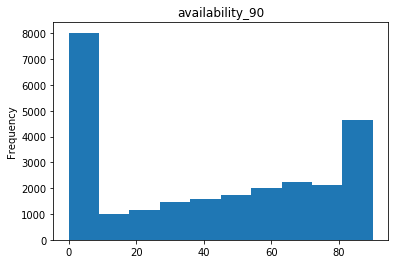

In [10]:
#Check availability_90 column spread

df['availability_90'].plot(kind='hist')
plt.title('availability_90')

Text(0.5,1,'Propularity of property type ')

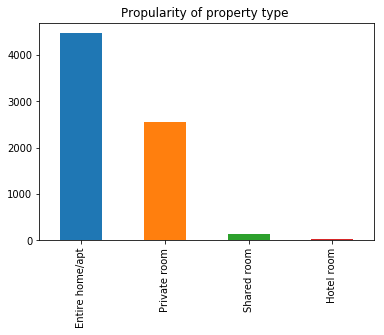

In [11]:
#Plot top 10 property_type with high demand where no availiable within 90 days

df[df['availability_90'] == 0]['room_type'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Propularity of property type ')

Questtion 2: Where are the most popular properties located?

In [12]:
na_proportion_check(df, 'neighbourhood_cleansed')

0.0

In [13]:
#Plot top 10 suburds with high demand where no availiable within 90 days
df_avail_90_prop = (df[df['availability_90'] == 0]['neighbourhood_cleansed'].value_counts()/ df['neighbourhood_cleansed'].value_counts()).sort_values(ascending=False)


Text(0.5,1,'Top 10 most popular suburb ')

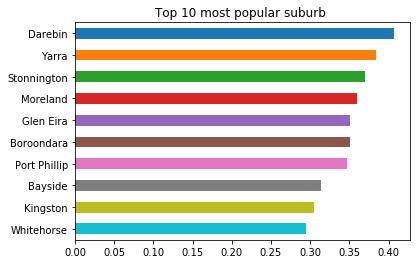

In [14]:
df_avail_90_prop[:10].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 most popular suburb ')

Question 3: Is Superhost truly experience lower vacancy than their counterpart?

In [15]:
na_proportion_check(df,'host_is_superhost')

0.027985218261605976

In [16]:
na_proportion_check(df,'host_id')

0.0

In [17]:
#Check if NA of host_is_superhost column is availble in the same dataset. 

df_dict = df[df['host_is_superhost'].notnull()][['host_id', 'host_is_superhost']]
host_dict = dict(zip(df_dict['host_id'], df_dict['host_is_superhost']))

null_superhost_series = df[df['host_is_superhost'].isnull()]['host_id']
keys_in_dict = null_superhost_series.isin(host_dict.keys())
keys_in_dict.sum()

0

In [18]:
#Remove NA in host_is_superhost

df_superhost_cleaned = df.dropna(subset=['host_is_superhost'], axis=0)
df_superhost_cleaned['host_is_superhost'].isnull().sum()

0

In [19]:
#Check mean value of availability_90 by host_is_superhost
df_superhost_cleaned.groupby(['host_is_superhost'])['availability_90'].mean()

host_is_superhost
f    39.189936
t    45.435040
Name: availability_90, dtype: float64

In [20]:
# Perform the summary stat

summary_stat = df_superhost_cleaned.groupby(['host_is_superhost'])['availability_90'].describe()

print(summary_stat)

                     count       mean        std  min   25%   50%   75%   max
host_is_superhost                                                            
f                  17985.0  39.189936  35.772018  0.0   0.0  38.0  75.0  90.0
t                   7266.0  45.435040  27.506975  0.0  23.0  48.0  68.0  90.0


In [21]:
# Perform the A/B test
group_a_superhost_t =df_superhost_cleaned[df_superhost_cleaned['host_is_superhost'] == 't']['availability_90']
group_b_superhost_f =df_superhost_cleaned[df_superhost_cleaned['host_is_superhost'] == 'f']['availability_90']

In [22]:
t_stat, p_value = stats.ttest_ind(group_a_superhost_t,group_b_superhost_f)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 13.3699
P-value: 0.0000


P-Valude is less than 0.0001, indicating that the two groups are statiscally different.  

4 What are the key determinants of rental pricing in the Melbourne Airbnb market?

Data cleaning and feature engineering


- Text column to numeric: bathrooms_text, 

- room_type selected over property_type as two columns contain duplicated information.

- numeric columns selected: accommodates, bedrooms selected over beds, bathroom_num

- Catergory columns transformed: host_is_superhost, neighbourhood_cleansed 

- result column: price

In [23]:
# check na counts in result column. Expecepted independent vars are less than 100 columns, minimum of rows required: 100 x10 = 1000. No impoact when dropiing na of price column
na_num_price = df['price'].isnull().sum()
print('Missing price data count: ', na_num_price)

Missing price data count:  6780


In [24]:
df_cln = df.copy()

In [25]:
# Convert bathroom_text to number

df_cln['bathrooms_num'] = df_cln['bathrooms_text'].apply(
    lambda item: str(item)[:3] if str(item)[1] == '.' else str(item)[:2]
).str.strip()
df_cln['bathrooms_num'] = pd.to_numeric(df_cln['bathrooms_num'], errors='coerce')

df_cln['bathrooms_num'].dtypes

dtype('float64')

In [26]:
column_to_retain = ['host_is_superhost', 'neighbourhood_cleansed', 'room_type','accommodates', 'bedrooms', 'price',
                    'bathrooms_num']

df_cln_final = df_cln[column_to_retain]
df_cln_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25978 entries, 0 to 25977
Data columns (total 7 columns):
host_is_superhost         25251 non-null object
neighbourhood_cleansed    25978 non-null object
room_type                 25978 non-null object
accommodates              25978 non-null int64
bedrooms                  23634 non-null float64
price                     19198 non-null object
bathrooms_num             25781 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
def fillna_with_mean(df, column_list_to_fill):
    """
    Fills missing (NA/NaN) values in specified DataFrame columns with their respective means.

    This function iterates through a list of column names and replaces any
    missing values in those columns with the mean of the non-missing values
    in that specific column. It modifies the DataFrame in place and returns
    the modified DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to be processed.
        column_list_to_fill (list): A list of strings, where each string is the
                                     name of a column in the DataFrame whose
                                     NA values should be filled with its mean.

    Returns:
        pd.DataFrame: The DataFrame with NA values in the specified columns
                      filled with their respective means.
    """
    # Ensure all columns in column_list_to_fill exist in the DataFrame
    for column in column_list_to_fill:
        if column not in df.columns:
            print(f"Warning: Column '{column}' not found in the DataFrame. Skipping this column for NA filling.")


    # Apply fillna with mean to the specified columns
    
    df[column_list_to_fill] = df[column_list_to_fill].apply(lambda col: col.fillna(col.mean()))

    return df

In [28]:
column_list_to_fill = ['bathrooms_num']
fillna_with_mean(df_cln_final, column_list_to_fill)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bedrooms,price,bathrooms_num
0,t,Moreland,Private room,2,1.0,$55.00,1.0
1,f,Port Phillip,Entire home/apt,2,1.0,NaN,1.0
2,t,Casey,Entire home/apt,5,3.0,$144.00,1.0
3,f,Darebin,Private room,2,NaN,NaN,1.0
4,t,Melbourne,Entire home/apt,4,2.0,$175.00,1.0
5,t,Monash,Entire home/apt,2,1.0,$124.00,1.0
6,t,Frankston,Private room,2,1.0,$79.00,1.5
7,f,Yarra,Entire home/apt,2,1.0,$160.00,1.0
8,t,Melbourne,Entire home/apt,4,1.0,$290.00,1.5
9,f,Yarra,Entire home/apt,2,1.0,NaN,1.0


In [29]:
#Clean and convert price column to number
df_cln_final['price'] = pd.to_numeric(df_cln_final['price'].str.replace('$','').str.strip(), errors='coerce')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
df_cln_final['price'].dtypes

dtype('float64')

In [31]:
#Drop NA from price column
df_cln_final.dropna(subset=['price'], axis=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# check column spread
df_cln_final.describe()

,accommodates,bedrooms,price,bathrooms_num
count,18821.000000,18771.000000,18821.000000,18821.000000
mean,3.861059,1.764371,204.414909,1.415694
std,2.425222,1.067084,141.099268,0.706363
min,1.000000,0.000000,17.000000,0.000000
25%,2.000000,1.000000,117.000000,1.000000
50%,4.000000,2.000000,168.000000,1.000000
75%,5.000000,2.000000,246.000000,2.000000
max,16.000000,16.000000,999.000000,9.000000


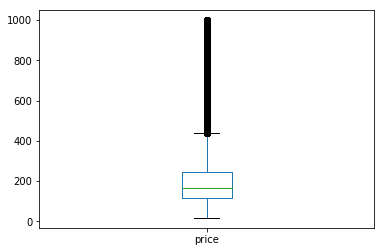

In [33]:
#Identify potential outliers using boxplot

df_cln_final['price'].plot(kind='box')

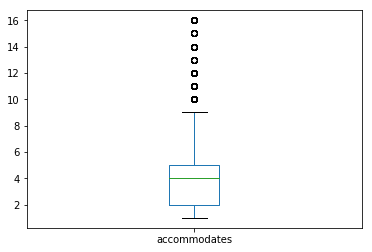

In [34]:
df_cln_final['accommodates'].plot(kind='box')

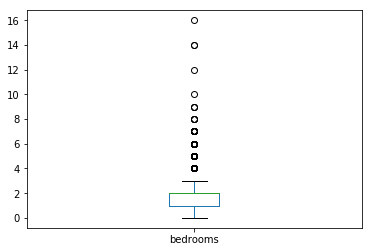

In [35]:
df_cln_final['bedrooms'].plot(kind='box')

In [45]:
def outlier_impute(df, column_list, factor=1.5):
    """
    Imputes outliers in specified DataFrame columns using the Interquartile Range (IQR) method.

    This function identifies outliers based on the IQR method (Q1 - factor*IQR, Q3 + factor*IQR)
    and replaces them with the calculated lower or upper limit. It operates on numerical columns.

    Args:
        df (pd.DataFrame): The DataFrame to be processed.
        column_list (list): A list of strings, where each string is the name of a
                            numerical column in the DataFrame whose outliers should be imputed.
        factor (float, optional): The multiplier for the IQR to determine the outlier bounds.
                                  Commonly 1.5 for mild outliers, 3.0 for extreme outliers.
                                  Defaults to 1.5.

    Returns:
        pd.DataFrame: The DataFrame with outliers in the specified columns imputed.
                      Original DataFrame is modified in place.
    """
    if not isinstance(factor, (int, float)):
        print(f"Error: 'factor' must be a numeric value. Received: {type(factor)}. No imputation performed.")
        return df

    for col in column_list:
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the DataFrame. Skipping this column for outlier imputation.")
            continue # Skip to the next column

        # Ensure the column is numeric before calculating quantiles
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Skipping this column for outlier imputation.")
            continue # Skip to the next column

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # Calculate outlier limits
        upper_limit = q3 + iqr * factor
        lower_limit = q1 - iqr * factor
        
        # Impute outliers
        # Values below the lower limit are set to the lower limit
        df.loc[df[col] < lower_limit, col] = lower_limit

        # Values above the upper limit are set to the upper limit
        df.loc[df[col] > upper_limit, col] = upper_limit
            
    return df


In [47]:
column_to_impute = ['price', 'accommodates', 'bedrooms', 'bathrooms_num']

outlier_impute(df_cln_final, column_to_impute, 1.5)

df_cln_final.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bedrooms,price,bathrooms_num
0,t,Moreland,Private room,2.0,1.0,55.0,1.0
2,t,Casey,Entire home/apt,5.0,3.0,144.0,1.0
4,t,Melbourne,Entire home/apt,4.0,2.0,175.0,1.0
5,t,Monash,Entire home/apt,2.0,1.0,124.0,1.0
6,t,Frankston,Private room,2.0,1.0,79.0,1.5


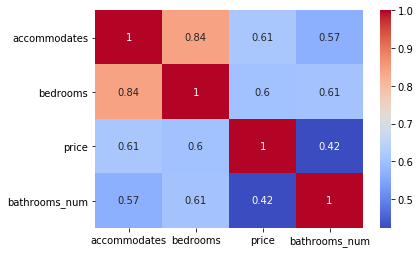

In [38]:
#Check correlation
sns.heatmap(df_cln_final.corr(),
           annot=True,
           cmap='coolwarm')

In [39]:
#Bedrooms and accomodates have strong correlation, and accommodates has tighter relation with price. Therefore, drop bedrooms
df_cln_final2 = df_cln_final[['host_is_superhost', 'neighbourhood_cleansed', 'room_type', 
                             'price', 'accommodates', 'bathrooms_num']]

In [40]:
df_cln_final2 = pd.get_dummies(df_cln_final2, drop_first=True)

In [41]:
# Final check NA in the dataset
df_cln_final2.isnull().sum().sort_values()

price                                       0
neighbourhood_cleansed_Melbourne            0
neighbourhood_cleansed_Melton               0
neighbourhood_cleansed_Monash               0
neighbourhood_cleansed_Moonee Valley        0
neighbourhood_cleansed_Moreland             0
neighbourhood_cleansed_Nillumbik            0
neighbourhood_cleansed_Maroondah            0
neighbourhood_cleansed_Port Phillip         0
neighbourhood_cleansed_Whitehorse           0
neighbourhood_cleansed_Whittlesea           0
neighbourhood_cleansed_Wyndham              0
neighbourhood_cleansed_Yarra                0
neighbourhood_cleansed_Yarra Ranges         0
room_type_Hotel room                        0
neighbourhood_cleansed_Stonnington          0
neighbourhood_cleansed_Maribyrnong          0
neighbourhood_cleansed_Manningham           0
neighbourhood_cleansed_Knox                 0
accommodates                                0
bathrooms_num                               0
host_is_superhost_t               

Modelling - Linear Regression

In [42]:
#Build lineary regression model and evaluate

X = df_cln_final2.drop(columns=['price'])
y = df_cln_final2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

lm = LinearRegression(normalize=True)

lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print('r2_score_train: ', r2_score_train)
print(' r2_score_test: ', r2_score_test)

r2_score_train:  0.498961090212
 r2_score_test:  0.492620395585


In [50]:
#Calculate fearture importance

feature_importance_df = pd.DataFrame({'feature':X.columns, 'coefficient':lm.coef_})
feature_importance_df['feature'] = feature_importance_df['feature'].str.replace('neighbourhood_cleansed_', '', regex=True)
feature_importance_df['coefficient_abs'] = abs(feature_importance_df['coefficient'])
feature_importance_df = feature_importance_df.sort_values(by=['coefficient_abs'], ascending=False).reset_index(drop=True)
feature_importance_df.head(10)

,feature,coefficient,coefficient_abs
0,room_type_Hotel room,117.722038,117.722038
1,Yarra Ranges,87.591396,87.591396
2,room_type_Shared room,-82.379664,82.379664
3,room_type_Private room,-49.562572,49.562572
4,Bayside,49.367465,49.367465
5,Yarra,40.836330,40.836330
6,Port Phillip,39.116671,39.116671
7,Nillumbik,36.974072,36.974072
8,Stonnington,34.583741,34.583741
9,bathrooms_num,31.993714,31.993714


In [52]:
def visualize_coefficients(feature_importance_df, top_n=10):
    """
    Visualizes the top N feature coefficients from the linear regression model.

    Creates a horizontal bar plot showing the impact (coefficient value) of the
    most important features on the target variable (price).

    Args:
        feature_importance_df (pd.DataFrame): DataFrame containing 'feature' and 'coefficient' columns.
        top_n (int, optional): The number of top features to visualize. Defaults to 10.
    """
    plt.figure(figsize=(10, 8))
    sns.barplot(x='coefficient', y='feature', data=feature_importance_df.head(top_n), palette='viridis')
    plt.title(f'Top {top_n} Feature Coefficients Impacting Rental Price')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


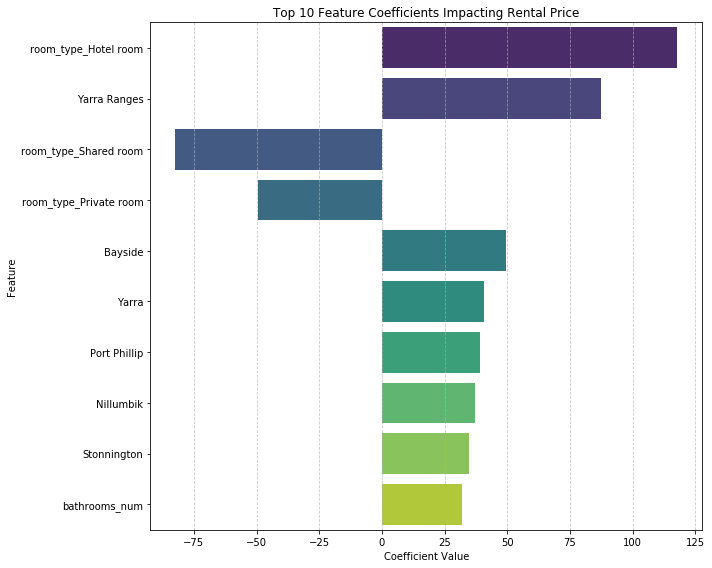

In [53]:
visualize_coefficients(feature_importance_df, top_n=10)